<a href="https://colab.research.google.com/github/Edwseth/Challenge_Alura_Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [183]:
# Cargar los archivos CSV desde las URLs para cada tienda

import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Cargar los datos en DataFrames de Pandas
tienda = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Muestra las primeras filas de los datos de la tienda 1 para verificar la estructura
tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [184]:
# Diccionario para mapear las URLs de las tiendas a nombres más legibles
mapa_tiendas = {
    url1: 'tienda_1',
    url2: 'tienda_2',
    url3: 'tienda_3',
    url4: 'tienda_4'
}


In [185]:
# Diccionario con nombres legibles para cada tienda
nombres_tiendas = {
    'tienda_1': "Tienda 1",
    'tienda_2': "Tienda 2",
    'tienda_3': "Tienda 3",
    'tienda_4': "Tienda 4"
}

In [186]:
# Función auxiliar para mapear claves y proporcionar nombres legibles
def mapear_diccionario(diccionario):
    resultado = {}
    for k, v in diccionario.items():
        if isinstance(k, dict):
            print("⚠️ Advertencia: Se encontró una clave que es un diccionario. Clave inválida:", k)
            continue
        clave = mapa_tiendas[k] if k in mapa_tiendas else k
        resultado[clave] = v
    return resultado


In [187]:
import unicodedata

# Función para normalizar los nombres de las columnas (eliminar espacios, convertir a minúsculas, quitar acentos)
def normalizar_columnas(df):
    df.columns = [unicodedata.normalize('NFKD', col.strip().lower()).encode('ascii', errors='ignore').decode('utf-8') for col in df.columns]
    return df

# Normalizar las columnas de todas las tiendas para asegurar consistencia en los datos
tienda = normalizar_columnas(tienda)
tienda2 = normalizar_columnas(tienda2)
tienda3 = normalizar_columnas(tienda3)
tienda4 = normalizar_columnas(tienda4)



#1. Análisis de facturación



In [188]:
# Función para calcular los ingresos totales por tienda
def analisis_facturacion():
  ingresos = {
      url1 : tienda["precio"].sum(),
      url2 : tienda2["precio"].sum(),
      url3 : tienda3["precio"].sum(),
      url4 : tienda4["precio"].sum()
  }
  return ingresos


# 2. Ventas por categoría

In [189]:
# Función para calcular las ventas por categoría de producto
def ventas_por_categoria():
  categorias = {
      url1 : tienda.groupby("categoria del producto")["producto"].count(),
      url2 : tienda2.groupby("categoria del producto")["producto"].count(),
      url3 : tienda3.groupby("categoria del producto")["producto"].count(),
      url4 : tienda4.groupby("categoria del producto")["producto"].count()
  }
  return categorias


# 3. Calificación promedio de la tienda


In [190]:
# Función para calcular la calificación promedio de cada tienda
def calificacion_promedio():
  calificaciones = {
      url1 : tienda["calificacion"].mean(),
      url2 : tienda2["calificacion"].mean(),
      url3 : tienda3["calificacion"].mean(),
      url4 : tienda4["calificacion"].mean()
  }
  return calificaciones

# 4. Productos más y menos vendidos

In [191]:
# Función para obtener los productos más y menos vendidos en cada tienda
def productos_vendidos():
    productos = {}
    dataframes = [tienda, tienda2, tienda3, tienda4]
    for i, df in enumerate(dataframes, start=1):
        productos[f"tienda_{i}"] = {
            "mas_vendido": df["producto"].value_counts().head(5),
            "menos_vendido": df["producto"].value_counts().tail(5)
        }
    return productos


# 5. Envío promedio por tienda

In [192]:
# Función para calcular el costo promedio de envío de cada tienda
def envio_promedio():
    envios = {
        url1 : tienda["costo de envio"].mean(),
        url2 : tienda2["costo de envio"].mean(),
        url3 : tienda3["costo de envio"].mean(),
        url4 : tienda4["costo de envio"].mean()
    }
    return envios


# 6. Relatorio

In [193]:
# Función que genera un reporte con las métricas calculadas
def relatorio(ingresos, categorias, calificaciones, productos, envios):
    menos_eficiente = min(ingresos, key=ingresos.get) # Encuentra la tienda con menos ingresos

     # Mostrar el reporte con todas las métricas calculadas
    print(f"La tienda menos eficiente es: {nombres_tiendas[menos_eficiente]}")
    print("\n--- Ingresos por tienda ---")
    for tienda, ingreso in ingresos.items():
        print(f"{nombres_tiendas[tienda]}: ${ingreso:,.2f}")

    print("\n--- Ventas por categoría ---")
    for tienda, cat in categorias.items():
        print(f"{nombres_tiendas[tienda]}:\n{cat}\n")

    print("\n--- Calificación promedio ---")
    for tienda, cal in calificaciones.items():
        print(f"{nombres_tiendas[tienda]}: {cal:.2f}")

    print("\n--- Productos vendidos ---")
    for tienda, prod in productos.items():
        print(f"{nombres_tiendas[tienda]}: {prod}")

    print("\n--- Promedio de costo de envío ---")
    for tienda, envio in envios.items():
        print(f"{nombres_tiendas[tienda]}: ${envio:.2f}")


In [212]:
import matplotlib.pyplot as plt

# Función para graficar las métricas de manera visual
def graficar_metricas(ingresos, calificaciones, envios, productos, categorias):
    metricas = {
        'Ingresos por Tienda': {
            'datos': ingresos,
            'color': 'mediumseagreen',
            'ylabel': 'Ingresos ($)'
        },
        'Calificación Promedio por Tienda': {
            'datos': calificaciones,
            'color': 'goldenrod',
            'ylabel': 'Calificación',
            'ylim': (0, 5)
        },
        'Cantidad de Productos Vendidos por Tienda': {
            'datos': productos,
            'color': 'cornflowerblue',
            'ylabel': 'Cantidad'
        },
        'Costo Promedio de Envío por Tienda': {
            'datos': envios,
            'color': 'salmon',
            'ylabel': 'Costo de Envío ($)'
        },
        'Mayor Venta en Categorías (unidad o $)': {
            'datos': categorias,
            'color': 'plum',
            'ylabel': 'Ventas'
        }
    }

    # Graficar cada métrica
    for titulo, metrica in metricas.items():
        tiendas = [nombres_tiendas[t] for t in metrica['datos'].keys()]
        valores = list(metrica['datos'].values())

        plt.figure(figsize=(10, 5))
        plt.bar(tiendas, valores, color=metrica['color'])
        plt.title(titulo)
        plt.ylabel(metrica['ylabel'])

        if 'ylim' in metrica:
            plt.ylim(metrica['ylim'])

        plt.tight_layout()
        plt.show()


In [213]:
# Ejecución de las funciones para obtener los datos de las tiendas
ingresos = mapear_diccionario(analisis_facturacion())
calificaciones = mapear_diccionario(calificacion_promedio())
productos = mapear_diccionario(productos_vendidos())
envios = mapear_diccionario(envio_promedio())
categorias = mapear_diccionario(ventas_por_categoria())

In [214]:
# Generar el reporte con los resultados de las métricas
relatorio(ingresos, categorias, calificaciones, productos, envios)

La tienda menos eficiente es: Tienda 4

--- Ingresos por tienda ---
Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00

--- Ventas por categoría ---
Tienda 1:
categoria del producto
Artículos para el hogar    171
Deportes y diversión       284
Electrodomésticos          312
Electrónicos               448
Instrumentos musicales     182
Juguetes                   324
Libros                     173
Muebles                    465
Name: producto, dtype: int64

Tienda 2:
categoria del producto
Artículos para el hogar    181
Deportes y diversión       275
Electrodomésticos          305
Electrónicos               422
Instrumentos musicales     224
Juguetes                   313
Libros                     197
Muebles                    442
Name: producto, dtype: int64

Tienda 3:
categoria del producto
Artículos para el hogar    177
Deportes y diversión       277
Electrodomésticos          278
Electrónicos               451
Instrumento

In [215]:
# Obtener los valores para graficar los productos más vendidos
productos_top_valores = {
    tienda: datos['mas_vendido'].max()  # cantidad del más vendido
    for tienda, datos in productos.items()
}


In [216]:
# Obtener los valores para graficar las categorías con mayor venta
categoria_top_valores = {
    tienda: categorias[tienda].max()
    for tienda in categorias
}


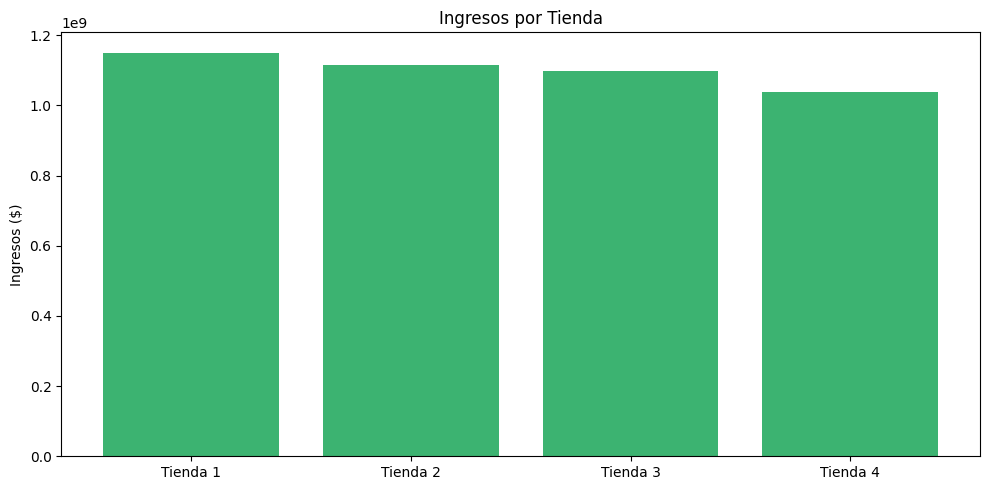

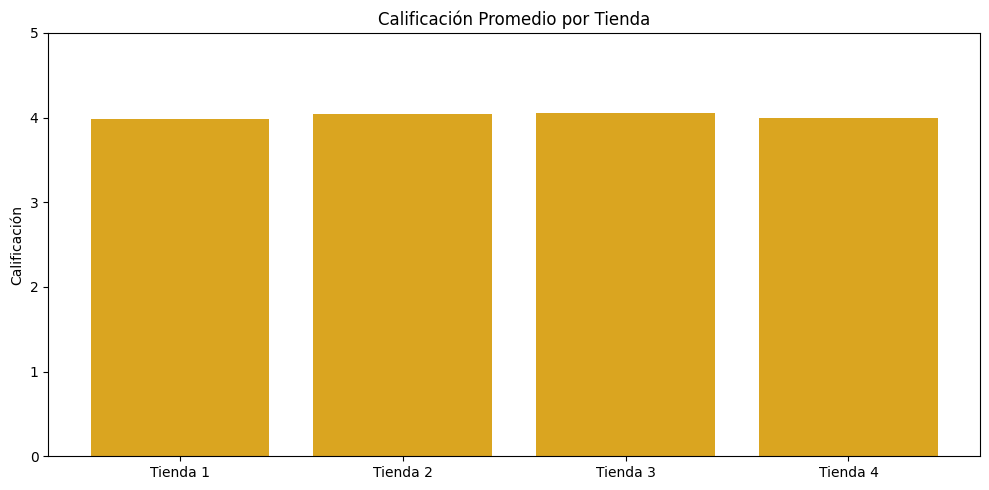

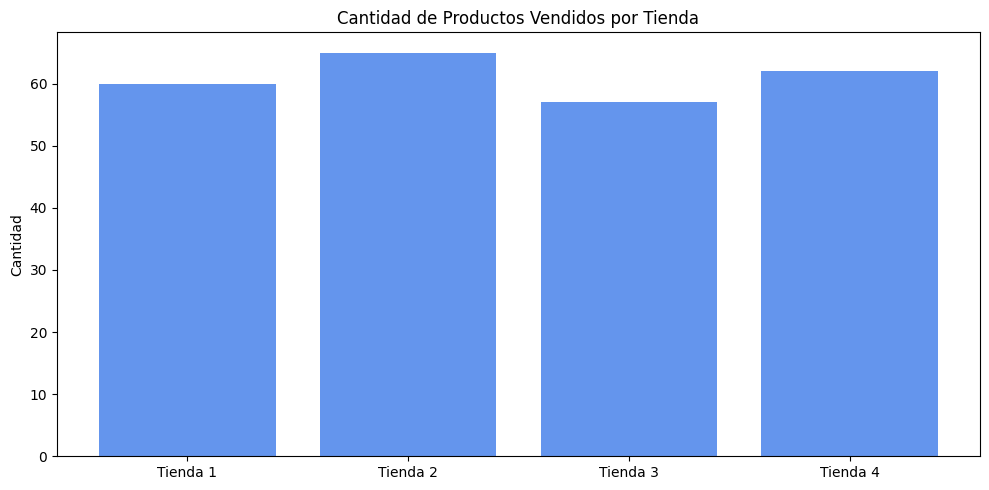

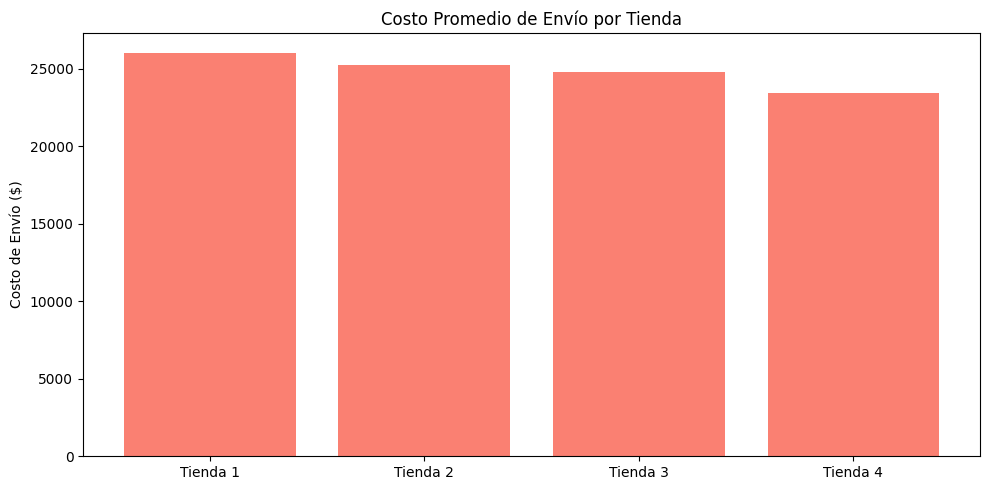

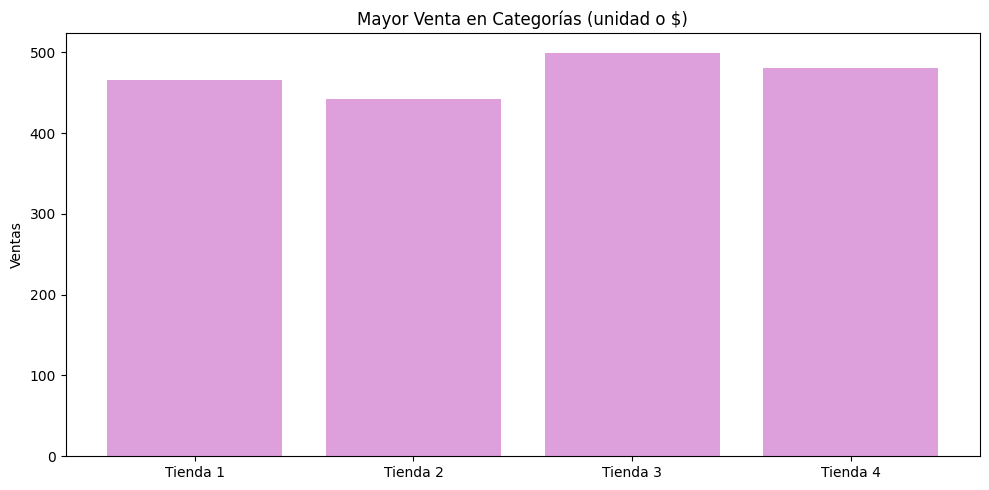

In [217]:
# Graficar las métricas visualmente
graficar_metricas(ingresos, calificaciones, envios, productos_top_valores, categoria_top_valores)

